In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Cleaning Data

In [2]:
# import data
df = pd.read_csv('D:\\DATA_SCIENCE\\LEAD_SCORING_ASSIGNMENT\\LEADS.CSV')

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning

In [6]:
#Now checking the percentage of missing values in each column

round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [7]:
# Checking the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

As it is clearly seen there are a lot of columns which have high number of missing values. Clearly, these columns are not useful.

In [8]:
# Droping all the columns in which greater than 3000 null values
for i in df.columns:
    if df[i].isnull().sum()>3000:
        df.drop(i, axis=1,inplace=True)

In [9]:
df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [10]:
#checking value counts of "City" column
df['City'].value_counts(dropna=False)

City
Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

Mumbai and Select are the two datapoints having maximum occurance in the city column, which wll not any use in our analysis. so lets drop it

In [11]:
# dropping the "City" feature
df.drop(['City'], axis = 1, inplace = True)

In [12]:
#checking value counts of "Country" column
df['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

like city column, the country column has highest value of India & Select and others are negligible compare to them so it won't help in analysis. lets drop the country column.

In [13]:
# dropping the "Country" column
df.drop(['Country'], axis = 1, inplace = True)

In [14]:
#Now checking the percentage of missing values in each column

round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [15]:
# Checking the number of null values again
df.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

In [16]:
df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

The variable What matters most to you in choosing a course has the level Better Career Prospects 6528 times while the other two levels appear once twice and once respectively.

So we should dropping this column as well.

In [17]:
df.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [18]:
df['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [19]:
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [20]:
df['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [21]:
df['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

From the value_counts() of various columns it is visible that there are many values Select which is equal to null value. So change it to null.

In [22]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('Select',np.nan)

In [23]:
# Checking the number of null values again
df.isnull().sum().sort_values(ascending=False)

How did you hear about X Education          7250
Lead Profile                                6855
Specialization                              3380
What is your current occupation             2690
TotalVisits                                  137
Page Views Per Visit                         137
Last Activity                                103
Lead Source                                   36
Prospect ID                                    0
Through Recommendations                        0
Receive More Updates About Our Courses         0
Update me on Supply Chain Content              0
Newspaper                                      0
Get updates on DM Content                      0
I agree to pay the amount through cheque       0
A free copy of Mastering The Interview         0
Digital Advertisement                          0
Search                                         0
X Education Forums                             0
Newspaper Article                              0
Magazine            

As it can be seen that the levels of "Lead Profile", "What is your current occupation" and "How did you hear about X Education" have a lot of rows which have the value Select which is of no use to the analysis

So it's best that we drop them.

In [24]:
# dropping Lead Profile and How did you hear about X Education cols
df.drop(['Lead Profile',"What is your current occupation" ,'How did you hear about X Education'], axis = 1, inplace = True)

In [25]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                                 9240
Lead Number                                 9240
Lead Origin                                    5
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Last Activity                                 17
Specialization                                18
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Update me on Supply 

In [26]:
# Dropping unique valued columns
df= df.drop(['Magazine',
             'Receive More Updates About Our Courses',
             'I agree to pay the amount through cheque',
             'Get updates on DM Content',
             'Update me on Supply Chain Content'],axis=1)

In [27]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                               9240
Lead Number                               9240
Lead Origin                                  5
Lead Source                                 21
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1731
Page Views Per Visit                       114
Last Activity                               17
Specialization                              18
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

In [28]:
def calculate_percentage(df, columns):
    result = {}
    for column in columns:
        counts = df[column].value_counts(normalize=True) * 100
        result[column] = counts
    return result

result = calculate_percentage(df, ['Digital Advertisement',
                                   'A free copy of Mastering The Interview',
                                   'Through Recommendations',
                                   'Digital Advertisement',
                                   'Newspaper',
                                   'X Education Forums',
                                   'Converted',
                                   'Do Not Call',
                                   'Do Not Email',
                                   'Search'])
print(result)


{'Digital Advertisement': Digital Advertisement
No     99.95671
Yes     0.04329
Name: proportion, dtype: float64, 'A free copy of Mastering The Interview': A free copy of Mastering The Interview
No     68.744589
Yes    31.255411
Name: proportion, dtype: float64, 'Through Recommendations': Through Recommendations
No     99.924242
Yes     0.075758
Name: proportion, dtype: float64, 'Newspaper': Newspaper
No     99.989177
Yes     0.010823
Name: proportion, dtype: float64, 'X Education Forums': X Education Forums
No     99.989177
Yes     0.010823
Name: proportion, dtype: float64, 'Converted': Converted
0    61.461039
1    38.538961
Name: proportion, dtype: float64, 'Do Not Call': Do Not Call
No     99.978355
Yes     0.021645
Name: proportion, dtype: float64, 'Do Not Email': Do Not Email
No     92.056277
Yes     7.943723
Name: proportion, dtype: float64, 'Search': Search
No     99.848485
Yes     0.151515
Name: proportion, dtype: float64}


The below mentioned columns having unique values more than 90% and are no values in analysis. so lets drop them
Digital Advertisement, 
Through Recommendations,
Newspaper,
X Education Forums,
Do Not Call,
Do Not Email,
Search

In [29]:

df.drop(['Digital Advertisement','Through Recommendations','Newspaper','X Education Forums','Do Not Call','Do Not Email','Search'], axis=1, inplace= True)

In [30]:
# dropping the Prospect Id as it has no significance in our anylysis.
df.drop(['Prospect ID'], axis=1, inplace= True)

In [31]:
# Checking the number of null values again
df.isnull().sum().sort_values(ascending=False)

Specialization                            3380
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Lead Number                                  0
Lead Origin                                  0
Converted                                    0
Total Time Spent on Website                  0
Newspaper Article                            0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [32]:
df.dtypes

Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
Newspaper Article                          object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [33]:
df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Newspaper Article,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,No,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,NaN,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,No,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,NaN,No,No,Modified


In [59]:
# Checking the number of null values again
df.isnull().sum().sort_values(ascending=False)

Specialization                            3380
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Lead Number                                  0
Lead Origin                                  0
Converted                                    0
Total Time Spent on Website                  0
Newspaper Article                            0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

# Dummy Variables

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          5860 non-null   object 
 9   Newspaper Article                       9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [35]:
df.loc[:, df.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'Newspaper Article', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [61]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df[['Lead Origin',
                                 'Lead Source',
                                 'Last Activity',
                                 'Specialization',
                                 'Newspaper Article',
                                 'A free copy of Mastering The Interview',
                                 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_dum = pd.concat([df, dummy], axis=1)
df_dum

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Newspaper Article,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,NaN,No,...,False,False,True,False,False,False,False,False,False,False
1,660728,API,Organic Search,0,5.0,674,2.50,Email Opened,NaN,No,...,False,False,False,False,False,False,False,False,False,False
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Business Administration,No,...,False,False,False,False,False,False,False,False,False,False
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Unreachable,Media and Advertising,No,...,False,False,True,False,False,False,False,False,False,False
4,660681,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,NaN,No,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,No,...,False,False,False,False,False,False,False,False,False,False
9236,579546,Landing Page Submission,Direct Traffic,0,2.0,238,2.00,SMS Sent,Media and Advertising,No,...,False,False,False,False,False,False,True,False,False,False
9237,579545,Landing Page Submission,Direct Traffic,0,2.0,199,2.00,SMS Sent,Business Administration,No,...,False,False,False,False,False,False,True,False,False,False
9238,579538,Landing Page Submission,Google,1,3.0,499,3.00,SMS Sent,Human Resource Management,No,...,False,False,False,False,False,False,True,False,False,False


In [62]:
# Assuming df_final_dum is your DataFrame
columns_to_drop = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Newspaper Article',
                   'A free copy of Mastering The Interview', 'Last Notable Activity']

df_dum = df_dum.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
df_dum.head()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,660728,0,5.0,674,2.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,660727,1,2.0,1532,2.0,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,660719,0,1.0,305,1.0,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,660681,1,2.0,1428,1.0,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [63]:
# Checking the number of null values again
df_dum.isnull().sum().sort_values(ascending=False)

TotalVisits                                           137
Page Views Per Visit                                  137
Lead Number                                             0
Specialization_Human Resource Management                0
Specialization_Rural and Agribusiness                   0
                                                     ... 
Lead Source_welearnblog_Home                            0
Lead Source_testone                                     0
Lead Source_google                                      0
Lead Source_blog                                        0
Last Notable Activity_View in browser link Clicked      0
Length: 79, dtype: int64

In [64]:
# Drop rows with NaN values
df_final_dum = df_dum.dropna()

In [66]:
# Checking the number of null values again
df_final_dum.isnull().sum().sort_values(ascending=False)

Lead Number                                           0
Specialization_Hospitality Management                 0
Specialization_Retail Management                      0
Specialization_Operations Management                  0
Specialization_Media and Advertising                  0
                                                     ..
Lead Source_google                                    0
Lead Source_blog                                      0
Lead Source_bing                                      0
Lead Source_Welingak Website                          0
Last Notable Activity_View in browser link Clicked    0
Length: 79, dtype: int64

In [92]:
import pandas as pd

# Assuming df is your DataFrame
# Check for columns with the object datatype
object_columns = df_final_dum.select_dtypes(include=['object']).columns

# Print the columns with the object datatype
if len(object_columns) > 0:
    print("Columns with object datatype:")
    print(object_columns)
else:
    print("No columns with object datatype.")


No columns with object datatype.


# Test-Train Split

In [68]:
# Import the required library
from sklearn.model_selection import train_test_split

In [69]:
X = df_final_dum.drop(['Converted'], axis=1)
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0.0,0,0.0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,660728,5.0,674,2.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,660727,2.0,1532,2.0,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,660719,1.0,305,1.0,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,660681,2.0,1428,1.0,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [70]:
# Putting the target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [93]:
import pandas as pd

# Assuming df is your DataFrame
# Check for columns with the object datatype
object_columns = X.select_dtypes(include=['object']).columns

# Print the columns with the object datatype
if len(object_columns) > 0:
    print("Columns with object datatype:")
    print(object_columns)
else:
    print("No columns with object datatype.")


No columns with object datatype.


In [71]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [72]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5414,608348,0.007968,0.669454,0.036364,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1411,645276,0.015936,0.555018,0.072727,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2137,639224,0.015936,0.029049,0.024182,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
97,659545,0.000000,0.000000,0.000000,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4949,612548,0.023904,0.569982,0.054545,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


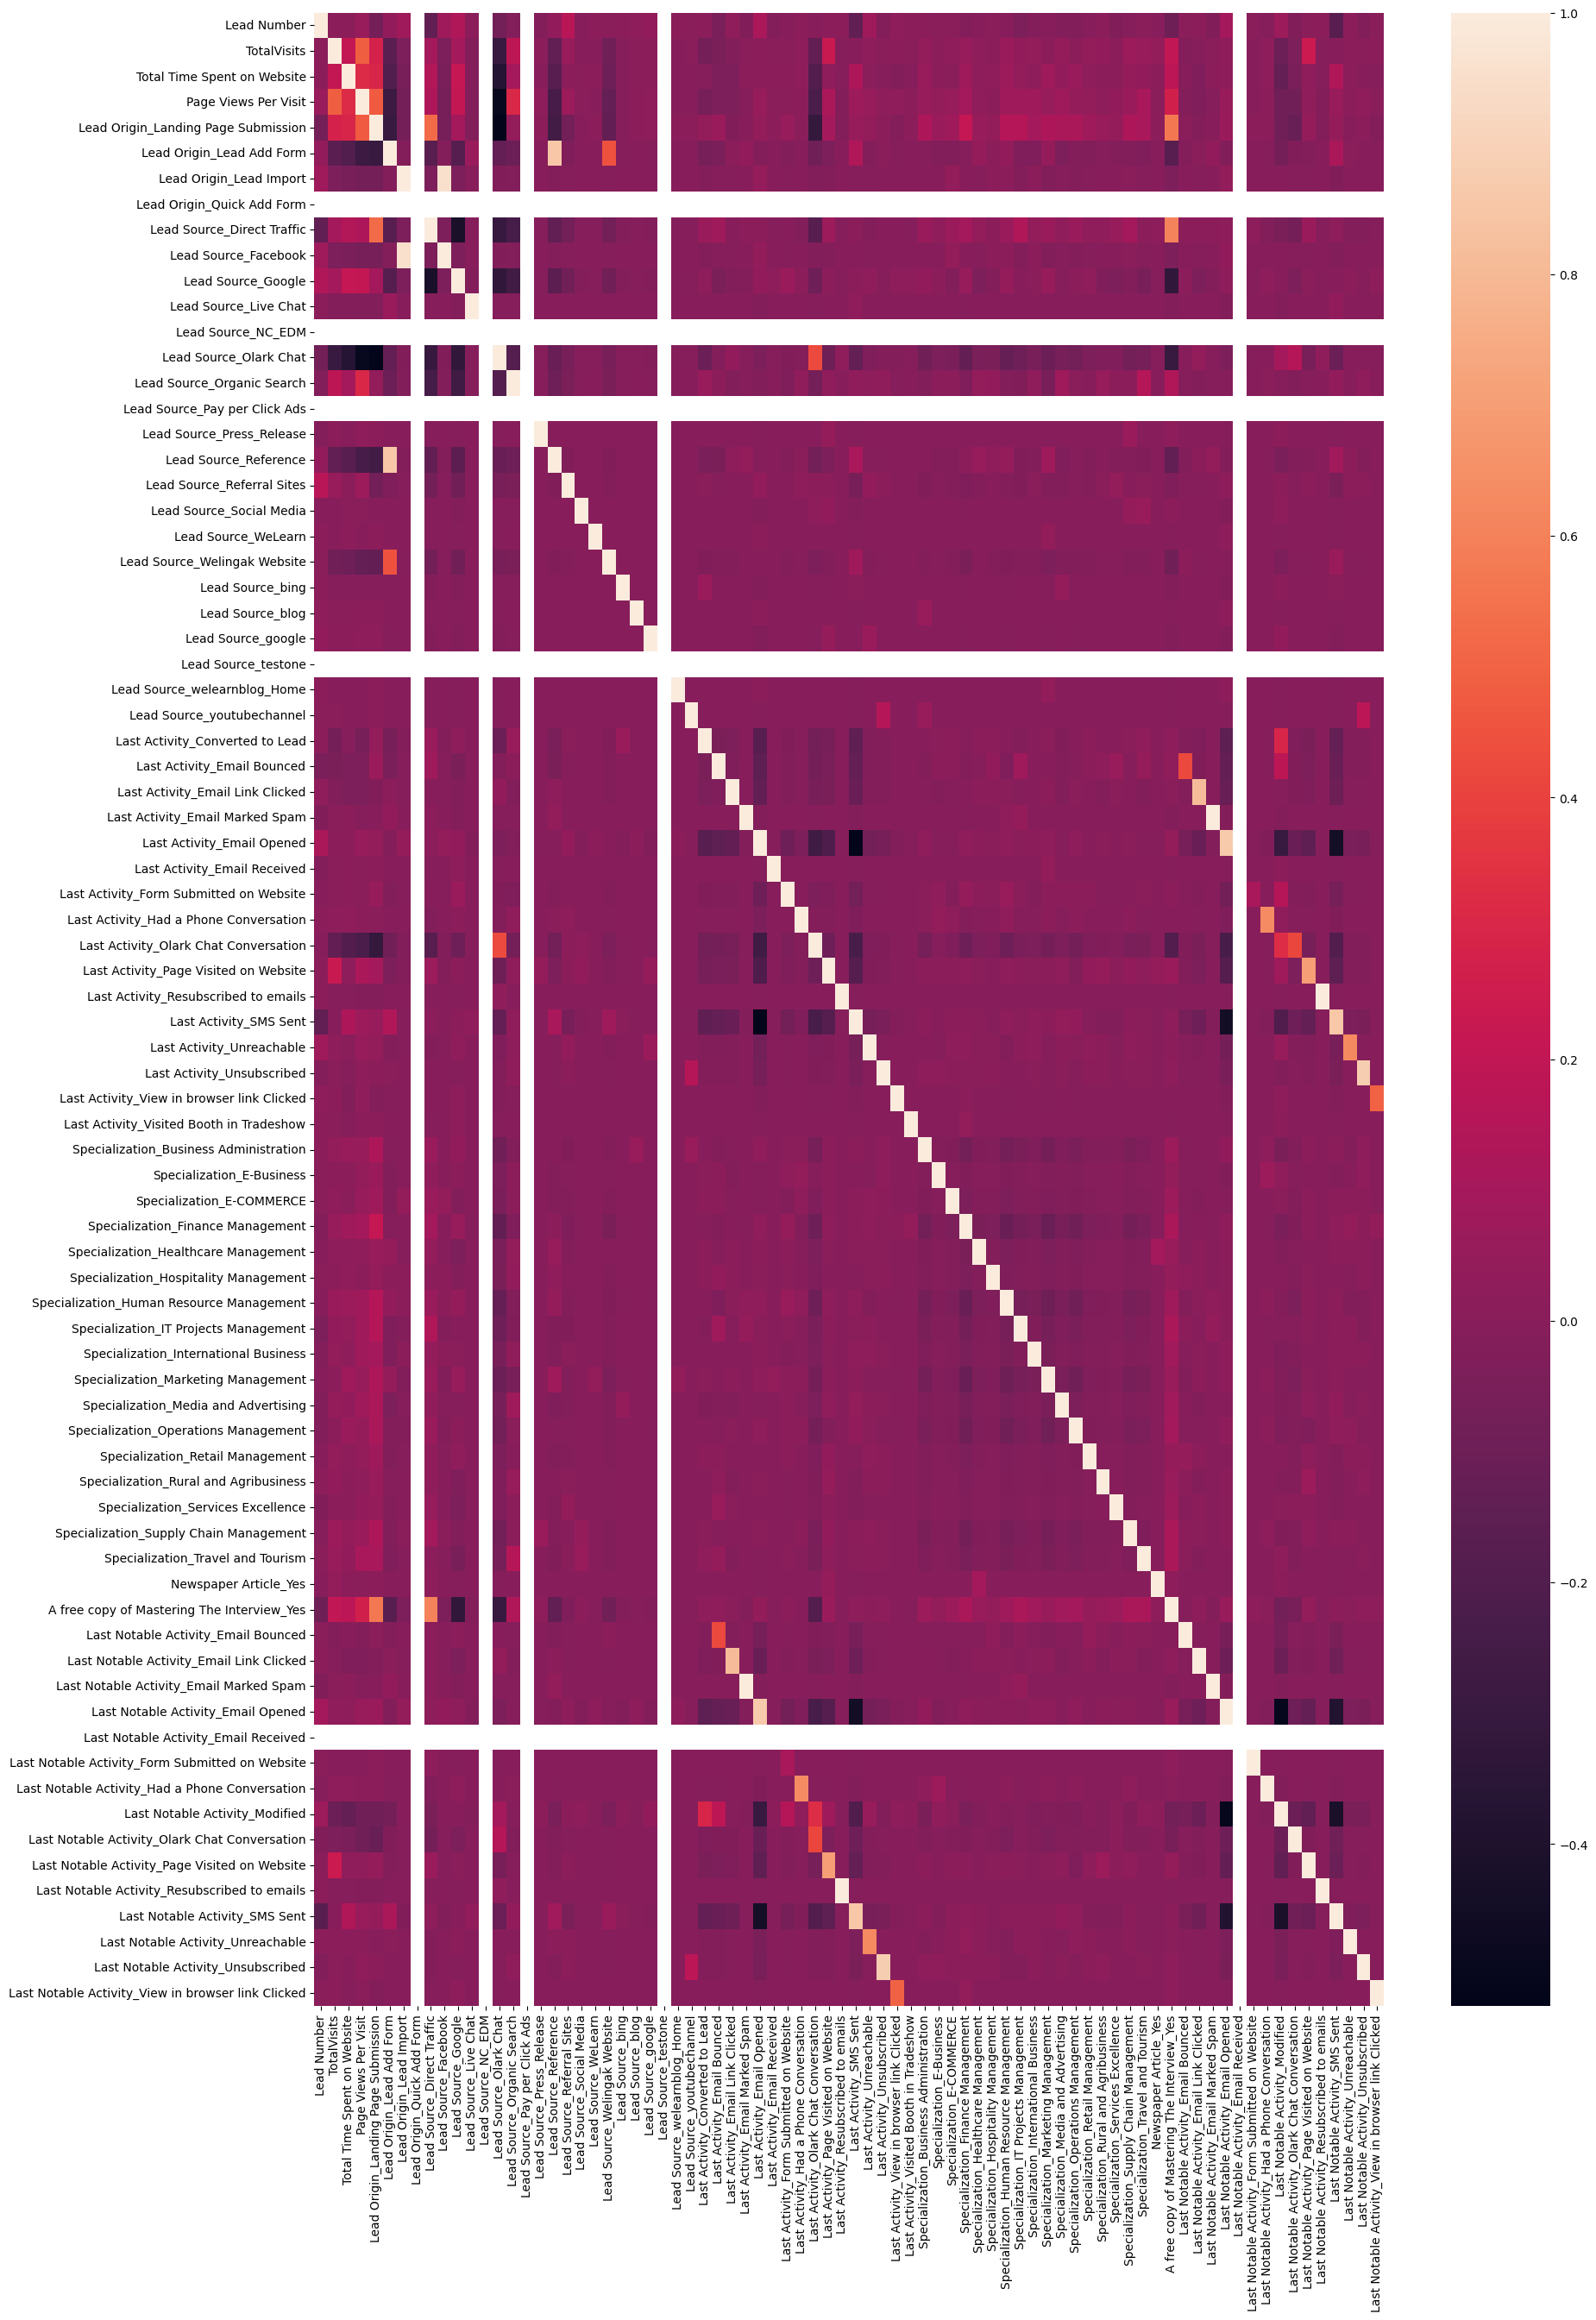

In [73]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

# Model Building

In [74]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [75]:
# Import RFE
from sklearn.feature_selection import RFE

In [80]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [81]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', False, 58),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 41),
 ('Lead Origin_Quick Add Form', False, 62),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 40),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Live Chat', False, 42),
 ('Lead Source_NC_EDM', False, 60),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Pay per Click Ads', False, 64),
 ('Lead Source_Press_Release', False, 49),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 17),
 ('Lead Source_Social Media', False, 59),
 ('Lead Source_WeLearn', False, 45),
 ('Lead Source_Welingak Website', False, 5),
 ('Lead Source_bing', False, 57),
 ('Lead Source_blog', False, 56),
 ('Lead Source_google', False, 38),
 ('Lead Source_

In [82]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [83]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [87]:
# Importing statsmodels
import statsmodels.api as sm

In [94]:
# Convert boolean columns to integers in X_train_sm
X_train_sm = X_train_sm.astype(int)
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const                                         float64
Lead Number                                     int64
Total Time Spent on Website                   float64
Lead Origin_Landing Page Submission              bool
Lead Origin_Lead Add Form                        bool
Lead Source_Direct Traffic                       bool
Lead Source_Olark Chat                           bool
Lead Source_Reference                            bool
Last Activity_Converted to Lead                  bool
Last Activity_Email Bounced                      bool
Last Activity_Email Opened                       bool
Last Activity_Olark Chat Conversation            bool
Last Activity_SMS Sent                           bool
A free copy of Mastering The Interview_Yes       bool
Last Notable Activity_Modified                   bool
Last Notable Activity_SMS Sent                   bool
dtype: object. The data was
5414    1
1411    1
2137    0
97      0
4949    1
       ..
4918    0
7411    0
1399    0
7413    0
1342    1
Name: Converted, Length: 6372, dtype: int64
and
       const  Lead Number  Total Time Spent on Website  \
5414    1.0       608348                     0.669454   
1411    1.0       645276                     0.555018   
2137    1.0       639224                     0.029049   
97      1.0       659545                     0.000000   
4949    1.0       612548                     0.569982   
...     ...          ...                          ...   
4918    1.0       612791                     0.023327   
7411    1.0       592676                     0.000000   
1399    1.0       645342                     0.255282   
7413    1.0       592664                     0.128081   
1342    1.0       645763                     0.018486   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5414                                 True                      False   
1411                                 True                      False   
2137                                 True                      False   
97                                  False                      False   
4949                                 True                      False   
...                                   ...                        ...   
4918                                False                      False   
7411                                False                      False   
1399                                 True                      False   
7413                                False                      False   
1342                                 True                      False   

      Lead Source_Direct Traffic  Lead Source_Olark Chat  \
5414                        True                   False   
1411                       False                   False   
2137                        True                   False   
97                         False                    True   
4949                       False                   False   
...                          ...                     ...   
4918                       False                   False   
7411                       False                    True   
1399                        True                   False   
7413                       False                   False   
1342                        True                   False   

      Lead Source_Reference  Last Activity_Converted to Lead  \
5414                  False                            False   
1411                  False                            False   
2137                  False                            False   
97                    False                            False   
4949                  False                            False   
...                     ...                              ...   
4918                  False                            False   
7411                  False                            False   
1399                  False                            False   
7413                  False                            False   
1342                  False                             True   

      Last Activity_Email Bounced  Last Activity_Email Opened  \
5414                        False                       False   
1411                        False                       False   
2137                        False                        True   
97                          False                       False   
4949                        False                       False   
...                           ...                         ...   
4918                        False                       False   
7411                         True                       False   
1399                        False                        True   
7413                        False                        True   
1342                        False                       False   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
5414                                  False                    True   
1411                                  False                   False   
2137                                  False                   False   
97                                     True                   False   
4949                                  False                    True   
...                                     ...                     ...   
4918                                  False                    True   
7411                                  False                   False   
1399                                  False                   False   
7413                                  False                   False   
1342                                  False                   False   

      A free copy of Mastering The Interview_Yes  \
5414                                        True   
1411                                       False   
2137                                        True   
97                                         False   
4949                                        True   
...                                          ...   
4918                                       False   
7411                                       False   
1399                                        True   
7413                                       False   
1342                                        True   

      Last Notable Activity_Modified  Last Notable Activity_SMS Sent  
5414                           False                            True  
1411                            True                           False  
2137                           False                           False  
97                              True                           False  
4949                           False                            True  
...                              ...                             ...  
4918                           False                            True  
7411                            True                           False  
1399                           False                           False  
7413                           False                           False  
1342                            True                           False  

[6372 rows x 16 columns]
before. After,
[1 1 0 ... 0 0 1]
[[1.0 608348 0.6694542253521127 ... True False True]
 [1.0 645276 0.5550176056338029 ... False True False]
 [1.0 639224 0.029049295774647887 ... True False False]
 ...
 [1.0 645342 0.25528169014084506 ... True False False]
 [1.0 592664 0.12808098591549297 ... False False False]
 [1.0 645763 0.018485915492957746 ... True True False]].

In [96]:
# Convert boolean columns to integers
X_train = X_train.astype(int)

# Add a constant term to X_train
X_train_sm = sm.add_constant(X_train)

# Create and fit the logistic regression model
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

# Display the summary
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3388.6
Date:                Sun, 14 Jan 2024   Deviance:                       6777.2
Time:                        20:53:38   Pearson chi2:                 6.47e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2381
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [97]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Activity_SMS Sent,7.91
14,Last Notable Activity_SMS Sent,7.04
2,Lead Origin_Landing Page Submission,4.97
9,Last Activity_Email Opened,4.34
3,Lead Origin_Lead Add Form,4.21
6,Lead Source_Reference,3.84
13,Last Notable Activity_Modified,3.31
12,A free copy of Mastering The Interview_Yes,2.71
4,Lead Source_Direct Traffic,2.39
10,Last Activity_Olark Chat Conversation,2.20


In [99]:
# The P value of Lead Origin_Landing Page Submission seems very high. so removing it
X_train.drop('Lead Origin_Landing Page Submission', axis = 1, inplace = True)

In [100]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3389.3
Date:                Sun, 14 Jan 2024   Deviance:                       6778.7
Time:                        21:03:02   Pearson chi2:                 6.46e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2379
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -5.4728      0.836     -6.544      0.000      -7.112      -3.834
Lead Number                                 7.465e-06   1.33e-06      5.613      0.000    4.86e-06    1.01e-05
Total Time Spent on Website                  -21.0063   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Origin_Lead Add Form                      3.5835      0.517      6.935      0.000       2.571       4.596
Lead Source_Direct Traffic                    -0.3393      0.083     -4.075      0.000      -0.502      -0.176
Lead Source_Olark Chat                        -0.1675      0.089     -1.883      0.060      -0.342       0.007
Lead Source_Reference                         -0.7005      0.560     -1.251      0.211      -1.798       0.397
Last Activity_Converted to Lead               -0.5932      0.200     -2.971      0.003      -0.985      -0.202
Last Activity_Email Bounced                   -1.4478      0.296     -4.891      0.000      -2.028      -0.868
Last Activity_Email Opened                     0.3246      0.099      3.288      0.001       0.131       0.518
Last Activity_Olark Chat Conversation         -1.1361      0.173     -6.567      0.000      -1.475      -0.797
Last Activity_SMS Sent                         0.5856      0.148      3.969      0.000       0.296       0.875
A free copy of Mastering The Interview_Yes     0.1140      0.079      1.448      0.148      -0.040       0.268
Last Notable Activity_Modified                -0.4038      0.094     -4.303      0.000      -0.588      -0.220
Last Notable Activity_SMS Sent                 1.0630      0.157      6.770      0.000       0.755       1.371
==============================================================================================================
"""

In [101]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_SMS Sent,7.91
13,Last Notable Activity_SMS Sent,7.04
8,Last Activity_Email Opened,4.34
2,Lead Origin_Lead Add Form,4.03
5,Lead Source_Reference,3.84
12,Last Notable Activity_Modified,3.31
11,A free copy of Mastering The Interview_Yes,2.43
3,Lead Source_Direct Traffic,2.28
9,Last Activity_Olark Chat Conversation,2.18
4,Lead Source_Olark Chat,1.69


In [104]:
# The P value of Total Time Spent on Website seems very high. so removing it
X_train.drop('Total Time Spent on Website', axis = 1, inplace = True)

In [105]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3390.3
Date:                Sun, 14 Jan 2024   Deviance:                       6780.5
Time:                        21:07:33   Pearson chi2:                 6.46e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2377
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -5.4735      0.836     -6.545      0.000      -7.113      -3.834
Lead Number                                 7.467e-06   1.33e-06      5.615      0.000    4.86e-06    1.01e-05
Lead Origin_Lead Add Form                      3.5831      0.517      6.935      0.000       2.570       4.596
Lead Source_Direct Traffic                    -0.3405      0.083     -4.090      0.000      -0.504      -0.177
Lead Source_Olark Chat                        -0.1677      0.089     -1.885      0.059      -0.342       0.007
Lead Source_Reference                         -0.7005      0.560     -1.251      0.211      -1.798       0.397
Last Activity_Converted to Lead               -0.5932      0.200     -2.971      0.003      -0.985      -0.202
Last Activity_Email Bounced                   -1.4476      0.296     -4.891      0.000      -2.028      -0.867
Last Activity_Email Opened                     0.3245      0.099      3.287      0.001       0.131       0.518
Last Activity_Olark Chat Conversation         -1.1366      0.173     -6.570      0.000      -1.476      -0.798
Last Activity_SMS Sent                         0.5856      0.148      3.968      0.000       0.296       0.875
A free copy of Mastering The Interview_Yes     0.1132      0.079      1.438      0.150      -0.041       0.267
Last Notable Activity_Modified                -0.4040      0.094     -4.305      0.000      -0.588      -0.220
Last Notable Activity_SMS Sent                 1.0610      0.157      6.758      0.000       0.753       1.369
==============================================================================================================
"""

In [106]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_SMS Sent,7.91
12,Last Notable Activity_SMS Sent,7.04
7,Last Activity_Email Opened,4.34
1,Lead Origin_Lead Add Form,4.03
4,Lead Source_Reference,3.84
11,Last Notable Activity_Modified,3.31
10,A free copy of Mastering The Interview_Yes,2.43
2,Lead Source_Direct Traffic,2.28
8,Last Activity_Olark Chat Conversation,2.18
3,Lead Source_Olark Chat,1.69


In [107]:
# The P value of TLead Source_Reference seems very high. so removing it
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [108]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3391.2
Date:                Sun, 14 Jan 2024   Deviance:                       6782.3
Time:                        21:10:42   Pearson chi2:                 6.48e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2375
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -5.4760      0.836     -6.549      0.000      -7.115      -3.837
Lead Number                                 7.472e-06   1.33e-06      5.619      0.000    4.87e-06    1.01e-05
Lead Origin_Lead Add Form                      3.0228      0.207     14.601      0.000       2.617       3.429
Lead Source_Direct Traffic                    -0.3402      0.083     -4.087      0.000      -0.503      -0.177
Lead Source_Olark Chat                        -0.1674      0.089     -1.882      0.060      -0.342       0.007
Last Activity_Converted to Lead               -0.5911      0.200     -2.960      0.003      -0.983      -0.200
Last Activity_Email Bounced                   -1.4382      0.294     -4.885      0.000      -2.015      -0.861
Last Activity_Email Opened                     0.3245      0.099      3.286      0.001       0.131       0.518
Last Activity_Olark Chat Conversation         -1.1355      0.173     -6.564      0.000      -1.475      -0.796
Last Activity_SMS Sent                         0.5874      0.148      3.979      0.000       0.298       0.877
A free copy of Mastering The Interview_Yes     0.1126      0.079      1.431      0.152      -0.042       0.267
Last Notable Activity_Modified                -0.4063      0.094     -4.330      0.000      -0.590      -0.222
Last Notable Activity_SMS Sent                 1.0592      0.157      6.746      0.000       0.751       1.367
==============================================================================================================
"""

In [109]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_SMS Sent,7.91
11,Last Notable Activity_SMS Sent,7.04
6,Last Activity_Email Opened,4.34
10,Last Notable Activity_Modified,3.31
9,A free copy of Mastering The Interview_Yes,2.43
2,Lead Source_Direct Traffic,2.28
7,Last Activity_Olark Chat Conversation,2.18
3,Lead Source_Olark Chat,1.69
4,Last Activity_Converted to Lead,1.47
5,Last Activity_Email Bounced,1.32


In [110]:
# The P value of A free copy of Mastering The Interview_Yes very high. so removing it
X_train.drop('A free copy of Mastering The Interview_Yes', axis = 1, inplace = True)

In [111]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3392.2
Date:                Sun, 14 Jan 2024   Deviance:                       6784.4
Time:                        21:14:07   Pearson chi2:                 6.49e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2372
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -5.4084      0.835     -6.480      0.000      -7.044      -3.772
Lead Number                            7.409e-06   1.33e-06      5.576      0.000     4.8e-06       1e-05
Lead Origin_Lead Add Form                 3.0027      0.207     14.537      0.000       2.598       3.408
Lead Source_Direct Traffic               -0.2750      0.070     -3.952      0.000      -0.411      -0.139
Lead Source_Olark Chat                   -0.1862      0.088     -2.118      0.034      -0.359      -0.014
Last Activity_Converted to Lead          -0.6004      0.200     -3.008      0.003      -0.992      -0.209
Last Activity_Email Bounced              -1.4464      0.294     -4.914      0.000      -2.023      -0.869
Last Activity_Email Opened                0.3217      0.099      3.259      0.001       0.128       0.515
Last Activity_Olark Chat Conversation    -1.1444      0.173     -6.624      0.000      -1.483      -0.806
Last Activity_SMS Sent                    0.5893      0.148      3.992      0.000       0.300       0.879
Last Notable Activity_Modified           -0.4102      0.094     -4.374      0.000      -0.594      -0.226
Last Notable Activity_SMS Sent            1.0507      0.157      6.698      0.000       0.743       1.358
=========================================================================================================
"""

In [112]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Last Activity_SMS Sent,7.91
10,Last Notable Activity_SMS Sent,7.03
6,Last Activity_Email Opened,4.34
9,Last Notable Activity_Modified,3.31
7,Last Activity_Olark Chat Conversation,2.18
3,Lead Source_Olark Chat,1.66
2,Lead Source_Direct Traffic,1.59
4,Last Activity_Converted to Lead,1.47
5,Last Activity_Email Bounced,1.31
1,Lead Origin_Lead Add Form,1.17


In [113]:
# The VIF value of Last Activity_SMS Sent very high. so removing it
X_train.drop('Last Activity_SMS Sent', axis = 1, inplace = True)

In [114]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3400.1
Date:                Sun, 14 Jan 2024   Deviance:                       6800.2
Time:                        21:15:43   Pearson chi2:                 6.50e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2353
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -5.2289      0.832     -6.284      0.000      -6.860      -3.598
Lead Number                            7.311e-06   1.33e-06      5.509      0.000    4.71e-06    9.91e-06
Lead Origin_Lead Add Form                 3.0396      0.207     14.716      0.000       2.635       3.444
Lead Source_Direct Traffic               -0.2778      0.069     -3.997      0.000      -0.414      -0.142
Lead Source_Olark Chat                   -0.1875      0.088     -2.134      0.033      -0.360      -0.015
Last Activity_Converted to Lead          -0.8362      0.189     -4.415      0.000      -1.207      -0.465
Last Activity_Email Bounced              -1.6530      0.289     -5.722      0.000      -2.219      -1.087
Last Activity_Email Opened                0.1850      0.091      2.044      0.041       0.008       0.362
Last Activity_Olark Chat Conversation    -1.3536      0.164     -8.277      0.000      -1.674      -1.033
Last Notable Activity_Modified           -0.2917      0.087     -3.336      0.001      -0.463      -0.120
Last Notable Activity_SMS Sent            1.5210      0.105     14.496      0.000       1.315       1.727
=========================================================================================================
"""

In [115]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Email Opened,3.77
9,Last Notable Activity_SMS Sent,3.12
8,Last Notable Activity_Modified,3.02
7,Last Activity_Olark Chat Conversation,1.84
3,Lead Source_Olark Chat,1.66
2,Lead Source_Direct Traffic,1.59
4,Last Activity_Converted to Lead,1.29
5,Last Activity_Email Bounced,1.20
1,Lead Origin_Lead Add Form,1.16
0,Lead Number,-0.00


## Creating Prediction

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [116]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5414    0.613425
1411    0.309329
2137    0.343307
97      0.096211
4949    0.683569
2447    0.295322
3529    0.323008
4064    0.272315
7208    0.912056
3436    0.387580
dtype: float64

In [117]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.61342538, 0.30932931, 0.34330695, 0.09621054, 0.68356944,
       0.29532228, 0.32300822, 0.27231511, 0.91205564, 0.3875804 ])

In [118]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.613425
1,1,0.309329
2,0,0.343307
3,0,0.096211
4,1,0.683569


In [119]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.613425,1
1,1,0.309329,0
2,0,0.343307,0
3,0,0.096211,0
4,1,0.683569,1


## Model Evaluation

In [121]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [122]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3406,  495],
       [1169, 1302]], dtype=int64)

In [123]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.738857501569366

In [124]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [125]:
# Calculating the sensitivity
TP/(TP+FN)

0.5269121813031161

In [126]:
# Calculating the specificity
TN/(TN+FP)

0.8731094591130479

With the current cut off as 0.5 we have around 73% accuracy, sensitivity of around 52% and specificity of around 87%.

## Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [127]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [128]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

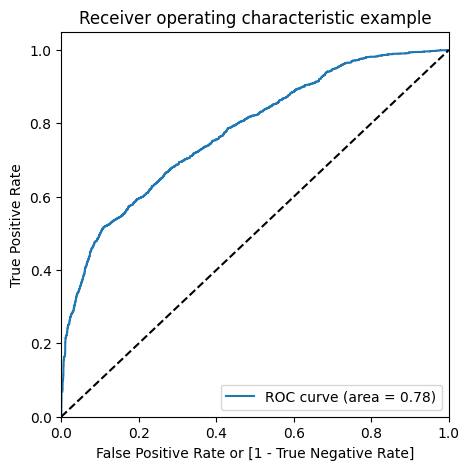

In [129]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under ROC curve is 0.78 which is a decent value.

In [130]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.613425,1,1,1,1,1,1,1,1,0,0,0
1,1,0.309329,0,1,1,1,1,0,0,0,0,0,0
2,0,0.343307,0,1,1,1,1,0,0,0,0,0,0
3,0,0.096211,0,1,0,0,0,0,0,0,0,0,0
4,1,0.683569,1,1,1,1,1,1,1,1,0,0,0


In [131]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.387790,1.000000,0.000000
0.1,0.1,0.506277,0.981384,0.205332
0.2,0.2,0.550220,0.947794,0.298385
0.3,0.3,0.641557,0.804533,0.538324
0.4,0.4,0.722536,0.590449,0.806204
0.5,0.5,0.738858,0.526912,0.873109
0.6,0.6,0.743409,0.486847,0.905922
0.7,0.7,0.693032,0.232699,0.984619
0.8,0.8,0.671061,0.162687,0.993079
0.9,0.9,0.663057,0.140429,0.994104


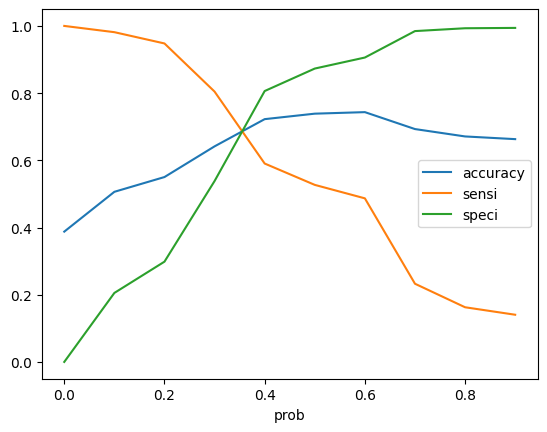

In [132]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph it is visible that the optimal cut off is at 0.35.

In [133]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.613425,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.309329,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.343307,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.096211,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.683569,1,1,1,1,1,1,1,1,0,0,0,1


In [135]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7004080351537979

In [136]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2784, 1117],
       [ 792, 1679]], dtype=int64)

In [137]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [138]:
# Calculating the sensitivity
TP/(TP+FN)

0.679481991096722

In [139]:
# Calculating the specificity
TN/(TN+FP)

0.7136631632914637

In [140]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.738857501569366

With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 70%.

## Prediction on Test set

In [142]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [143]:
# Substituting all the columns in the final train model
col = X_train.columns

In [144]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,Lead Number,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
5643,1.0,606675,False,True,False,False,True,False,False,True,False
7718,1.0,590626,False,False,False,False,False,True,False,False,False
4666,1.0,614973,False,False,False,True,False,False,False,True,False
3476,1.0,627108,False,False,False,False,False,True,False,False,False
4881,1.0,613188,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
301,1.0,657225,False,False,False,False,False,False,False,True,False
8589,1.0,584235,False,True,False,True,False,False,False,True,False
54,1.0,660048,False,False,False,False,False,True,False,False,False
7376,1.0,592857,False,True,False,False,False,True,False,False,False


In [148]:
# Convert boolean columns to numeric (0 for False, 1 for True)
X_test_sm[['Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
           'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
           'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
           'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent']] = X_test_sm[
           ['Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
            'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
            'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
            'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent']].astype(int)

# Storing prediction of the test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)


In [149]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.046697
1,0,0.326054
2,0,0.134588
3,0,0.387133
4,1,0.301760


In [150]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.046697,0
1,0,0.326054,0
2,0,0.134588,0
3,0,0.387133,1
4,1,0.301760,0
...,...,...,...
2726,1,0.328296,0
2727,0,0.086000,0
2728,0,0.445574,1
2729,0,0.271394,0


In [151]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7056023434639326

In [152]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7056023434639326

In [153]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [154]:
# Calculating the sensitivity
TP/(TP+FN)

0.679481991096722

In [155]:
# Calculating the specificity
TN/(TN+FP)

0.7136631632914637

With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 70%.

## Precision-Recall

In [156]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3406,  495],
       [1169, 1302]], dtype=int64)

In [157]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7245409015025042

In [158]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5269121813031161

With the current cut off as 0.35 we have Precision around 72% and Recall around 52%

##  Precision and recall tradeoff

In [159]:
from sklearn.metrics import precision_recall_curve

In [160]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       1
 2       0
 3       0
 4       1
        ..
 6367    0
 6368    0
 6369    0
 6370    0
 6371    1
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       1
        ..
 6367    1
 6368    0
 6369    0
 6370    0
 6371    0
 Name: Predicted, Length: 6372, dtype: int64)

In [161]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

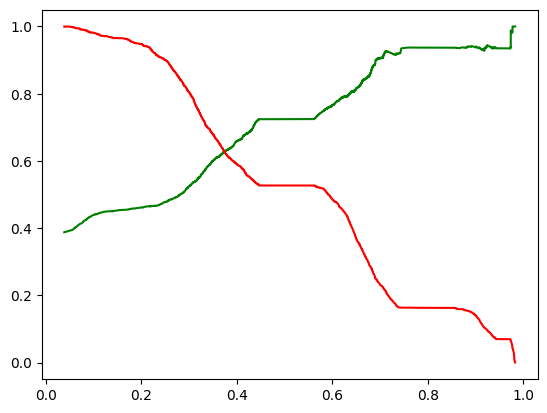

In [162]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [163]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.613425,1,1,1,1,1,1,1,1,0,0,0,1
1,1,0.309329,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.343307,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.096211,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.683569,1,1,1,1,1,1,1,1,0,0,0,1


In [164]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.724105461393597

In [165]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3183,  718],
       [1040, 1431]], dtype=int64)

In [166]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [167]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.6658911121451838

In [168]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.5791177660866046

##  Prediction on Test set

In [169]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.046697
1,0,0.326054
2,0,0.134588
3,0,0.387133
4,1,0.301760


In [170]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.046697,0
1,0,0.326054,0
2,0,0.134588,0
3,0,0.387133,0
4,1,0.301760,0
...,...,...,...
2726,1,0.328296,0
2727,0,0.086000,0
2728,0,0.445574,1
2729,0,0.271394,0


In [171]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7429512998901501

In [172]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1455,  286],
       [ 416,  574]], dtype=int64)

In [173]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [174]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.6674418604651163

In [175]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.5797979797979798